# Preprocessing of Data

RHEOS offers several functions for sampling and filtering data; this page is intended to be a brief tutorial of their use. For detailed descriptions of functions and their optional arguments, see the [API](@ref) section. 

In [1]:
using RHEOS
using PyPlot

## Upsampling and Downsampling

We generate a simple sinusoid with constant sampling rate (more details about data generation are discussed in the [Generating Data](@ref) section).

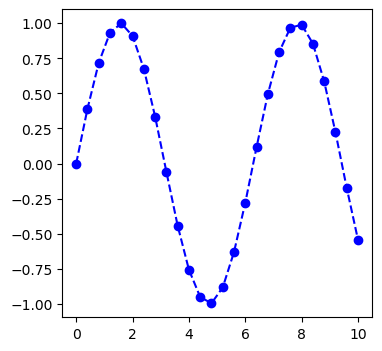

In [2]:
# Generate a sinusoidal data set
d = timeline(t_start=0, t_end=10, step = 0.4)
d = strainfunction(d,t->sin(t))

# Plotting
fig, ax = subplots(1,1, figsize=(4,4))
ax.plot(d.t, d.ϵ, "--", marker = "o", markersize = 6, color = "blue");

To change the sampling rate of the data set, the function [`resample`](@ref) can be used with the keyword argument `scale`, controlling the scaling factor on the sampling rate. `scale=2` double the sampling rate (upsampling) whereas `scale=1//2` would keep one every other value (downsampling). Any positive real value can be used, and point will be extrapolated accordingly. 

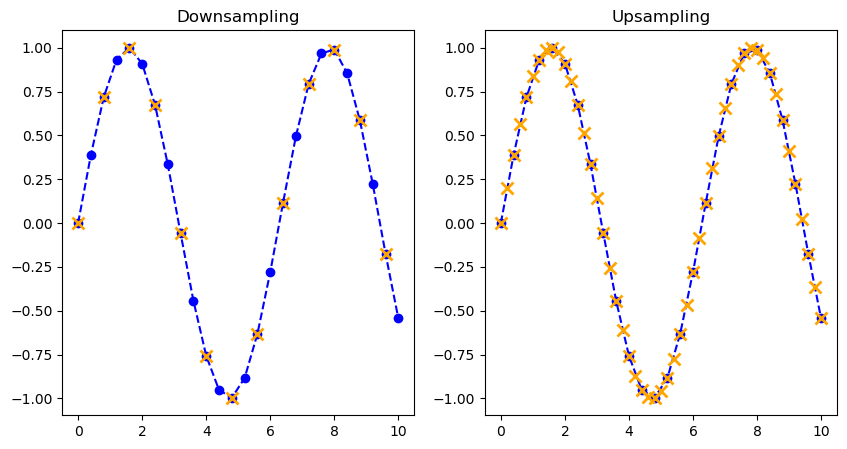

In [3]:
# Downsample
d_downsample = resample(d, scale=1//2)
# Upsample
d_upsample = resample(d, scale=2)

# Plotting
fig, ax = subplots(1,2, figsize=(10,5))
ax[1].set_title("Downsampling")
ax[1].plot(d.t, d.ϵ, "--", marker = "o", markersize = 6, color = "blue");
ax[1].plot(d_downsample.t, d_downsample.ϵ, ".", marker = "x", markersize = 8, markeredgewidth=2, color = "orange");
ax[2].set_title("Upsampling")
ax[2].plot(d.t, d.ϵ, "--", marker = "o", markersize = 6, color = "blue");
ax[2].plot(d_upsample.t, d_upsample.ϵ, ".", marker = "x", markersize = 8, markeredgewidth=2, color = "orange");

RHEOS also allows us to specify the time step `dt` required between data points. Values are obtained by spline interpolation using the module Dierckx. This is particularly useful to obtain a uniform sampling rate from an uneven sample.

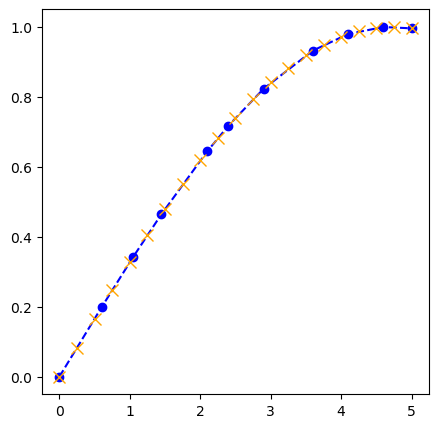

In [4]:
# Variable sampling: Downsampling region [0,5] and upsampling [5,10]
d = RheoTimeData(t=[0,0.6,1.05,1.45,2.1,2.4,2.9,3.6,4.1,4.6,5])
d = strainfunction(d,t->sin(t/3.))

# Plotting
fig, ax = subplots(1,1, figsize=(5,5))
ax.plot(d.t, d.ϵ, "--", marker = "o", markersize = 6, color = "blue");

d = resample(d,dt=0.25)
ax.plot(d.t, d.ϵ, ".", marker = "x", markersize = 8, color = "orange");


## Cutting

RHEOS provides a dedicated function to remove the data outside a specified time interval.

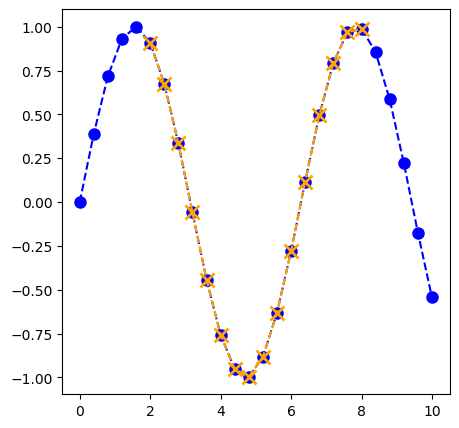

In [5]:
# Generate a sinusoidal data set
d = timeline(t_start=0, t_end=10, step = 0.4)
d = strainfunction(d,t->sin(t))

d_cut = cutting(d, 2.0, 8.0)

# Plotting
fig, ax = subplots(1,1, figsize=(5,5))
ax.plot(d.t, d.ϵ, "--", marker = "o", markersize = 8, color = "blue");
ax.plot(d_cut.t, d_cut.ϵ, "--", marker = "x", markersize = 10, markeredgewidth=2, color = "orange");

## Smoothing

Lastly, RHEOS provides a smoothing function, [`smooth`](@ref). The first argument is the data to smooth and the second argument is the (very) approximate time scale of smoothing. (It uses Gaussian smoothing and can be thought of as a low pass filter for information occuring on time scales shorter than the 2nd argument). The padding can be changed using a keyword argument if desired, see [API](@ref) and [ImageFiltering.jl Documentation](https://juliaimages.github.io/ImageFiltering.jl/stable/function_reference.html) for more details. 

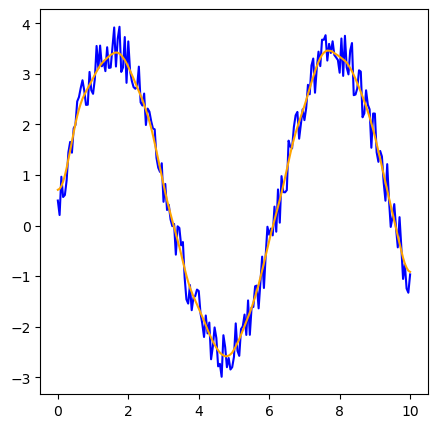

In [6]:
d_s=timeline(t_start=0, t_end=10, step = 0.05);
d_s=strainfunction(d_s,t->3*sin(t));
noise=strainfunction(d_s,t->rand());

d_noisy = d_s + noise
d_smooth = smooth(d_noisy, 1)

fig, ax = subplots(1,1, figsize=(5,5))
ax.plot(d_noisy.t, d_noisy.ϵ, color = "blue");
ax.plot(d_smooth.t, d_smooth.ϵ, color = "orange");